In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training6.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.283796,0.588021,0.290969,0.282278,0.784029,0.784029,0.784029,0.0,0.784029,0.0,...,0.0,0.0,0.0,0.0,0.138435,0.774979,0.841925,0.729303,0.035697,208500
1,0.092527,0.596101,0.365551,0.329517,0.794802,0.794802,0.794802,0.0,0.397401,0.0,...,0.0,0.0,0.0,0.0,0.366577,0.781355,0.853494,0.739325,0.224365,181500
2,0.276849,0.575928,0.293967,0.377339,0.767904,0.000000,0.767904,0.0,0.767904,0.0,...,0.0,0.0,0.0,0.0,0.645407,0.749653,0.824610,0.714304,0.048948,223500
3,0.325659,0.577848,0.260568,0.317907,0.770464,0.000000,0.770464,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.134972,0.757275,0.827359,0.000000,0.638451,140000
4,0.247985,0.518287,0.326673,0.434552,0.691049,0.000000,0.691049,0.0,0.345525,0.0,...,0.0,0.0,0.0,0.0,0.775564,0.664857,0.742080,0.642814,0.050342,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.149958,-0.395050,0.113581,0.317537,-0.488240,-0.317057,-0.200098,-0.014314,-0.165933,0.005742,...,0.042390,0.090962,0.085395,-0.026840,-0.098794,-0.573913,-0.307684,-0.001034,-0.571548,1.000000
GrLivArea,0.109397,-0.208915,0.099421,-0.015611,-0.224525,-0.168171,-0.128206,-0.020050,-0.100007,-0.048385,...,0.007700,0.052381,0.053335,-0.037432,-0.011940,-0.271855,-0.175348,-0.041676,-0.228113,0.589120
GarageArea,-0.102609,-0.272965,0.163152,0.069512,-0.206190,-0.167510,-0.007230,0.000376,-0.087617,-0.063508,...,0.027967,0.018784,-0.006017,-0.042975,-0.030864,-0.209394,-0.180956,0.078789,-0.504633,0.505566
GarageCars,-0.025598,-0.226690,0.131242,0.014013,-0.165928,-0.177420,-0.005890,0.001519,-0.085281,-0.069889,...,0.027165,0.015425,-0.017865,-0.060124,-0.016287,-0.172838,-0.147486,0.097013,-0.558473,0.504552
TotalBsmtSF,-0.254642,-0.150886,0.175788,0.059492,-0.126953,-0.170931,0.001812,-0.022100,-0.037908,-0.047332,...,0.030134,0.062056,0.009560,-0.043781,-0.016115,-0.159271,-0.161371,0.024657,-0.400962,0.500621
OverallQual,0.158913,-0.069057,0.056226,-0.338996,0.145592,-0.086879,0.110167,-0.016284,0.046199,-0.166283,...,0.006592,0.005374,-0.027426,-0.061161,0.091586,0.161213,0.009252,0.185739,-0.498392,0.488216
1stFlrSF,-0.244680,-0.102913,0.205277,0.009925,-0.105627,-0.135931,-0.032153,0.002520,-0.040561,-0.039258,...,0.042364,0.054946,0.018800,-0.055110,0.003352,-0.132602,-0.181235,-0.006951,-0.282207,0.436239
MasVnrArea,0.024757,-0.156048,0.043841,0.025674,-0.192391,-0.113695,-0.023828,0.060766,-0.054439,-0.049446,...,0.018037,0.053694,-0.018137,-0.033129,-0.054778,-0.213859,-0.144448,-0.013854,-0.322663,0.426354
Fireplaces,-0.061848,-0.126831,0.074122,0.179437,-0.233658,-0.209772,-0.134864,0.013120,-0.094607,0.033067,...,0.008254,0.169294,0.050150,-0.006998,-0.028060,-0.284568,-0.110770,-0.000086,-0.176910,0.399534
FullBath,0.166597,-0.228867,0.023200,-0.132801,-0.062543,-0.136374,0.037362,-0.034132,0.003399,-0.118610,...,0.025886,-0.061983,-0.011930,-0.036091,0.019664,-0.081209,-0.083164,0.089712,-0.480101,0.395909


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
model=GradientBoostingRegressor()

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'OverallQual', '1stFlrSF', 'MasVnrArea', 'Fireplaces', 'FullBath'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,24693.457776,38617.172830,0.805577
1,11,23481.183970,37345.822242,0.818168
2,12,21388.619922,32600.486212,0.861441
3,13,21326.224201,31914.289273,0.867213
4,14,21049.929324,30853.246389,0.875895
...,...,...,...,...
105,115,16963.618749,28008.013222,0.897729
106,116,16764.665884,27075.232788,0.904428
107,117,16823.033046,27412.618331,0.902031
108,118,16843.158757,27365.736606,0.902366


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
74,84,16716.195055,27034.420216,0.904716
104,114,16738.924491,27028.239431,0.904759
79,89,16764.192748,27236.529696,0.903286
106,116,16764.665884,27075.232788,0.904428
97,107,16765.779759,27277.521240,0.902995
...,...,...,...,...
4,14,21049.929324,30853.246389,0.875895
3,13,21326.224201,31914.289273,0.867213
2,12,21388.619922,32600.486212,0.861441
1,11,23481.183970,37345.822242,0.818168


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


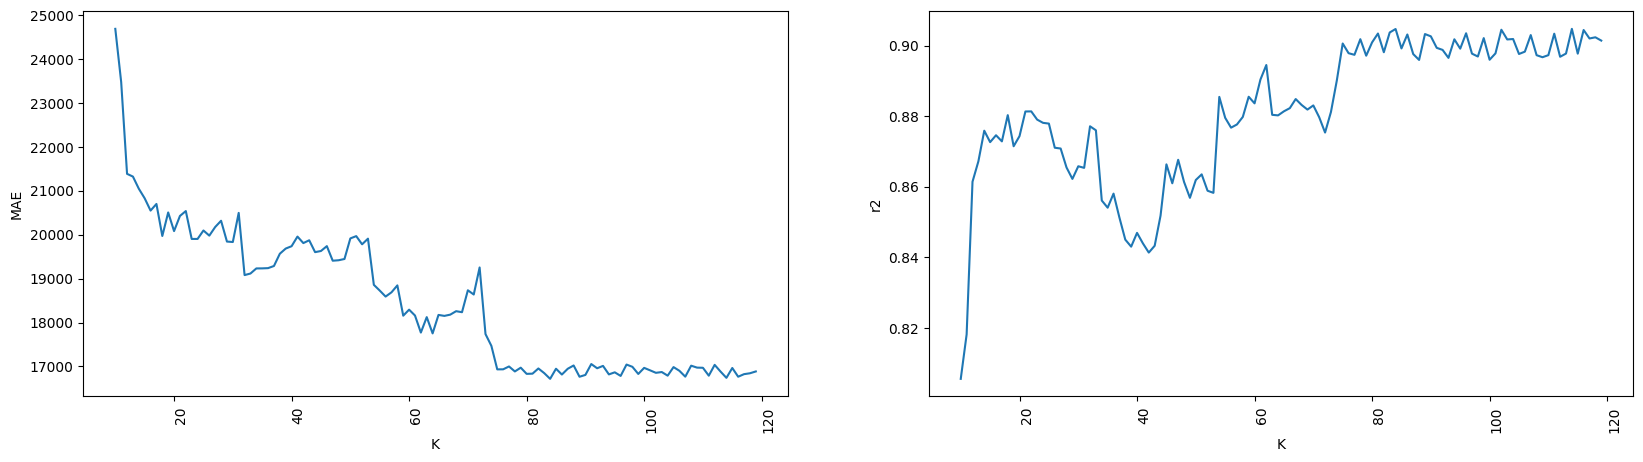

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       4.398967e-02
MSZoning         2.081592e-02
LotFrontage      7.395555e-03
LotArea          1.775773e-02
Street           8.537823e-03
                     ...     
YrSold           8.563767e-03
SaleType         3.334230e-02
SaleCondition    4.257620e-02
Ageofhouse       4.753259e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,16811.100196,27368.295105,0.902348
1,101,17027.311285,28169.789066,0.896545
2,102,16938.278863,28051.181559,0.897414
3,103,16891.088192,28023.548657,0.897616
4,104,16832.052712,27333.127949,0.902599
...,...,...,...,...
395,495,16580.899123,26989.984559,0.905029
396,496,16573.708604,26804.264489,0.906331
397,497,16544.015465,26963.992811,0.905212
398,498,16560.604697,26677.483407,0.907215


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
347,447,16379.052596,26030.769059,0.911659
247,347,16423.178536,26418.437275,0.909009
333,433,16423.946945,26402.968856,0.909115
312,412,16429.642439,26334.617852,0.909585
332,432,16430.501377,26277.543574,0.909977
...,...,...,...,...
50,150,17043.774689,28254.763836,0.895919
31,131,17046.586014,28165.990601,0.896572
49,149,17061.852382,28448.134380,0.894490
61,161,17065.902618,28392.375079,0.894903


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


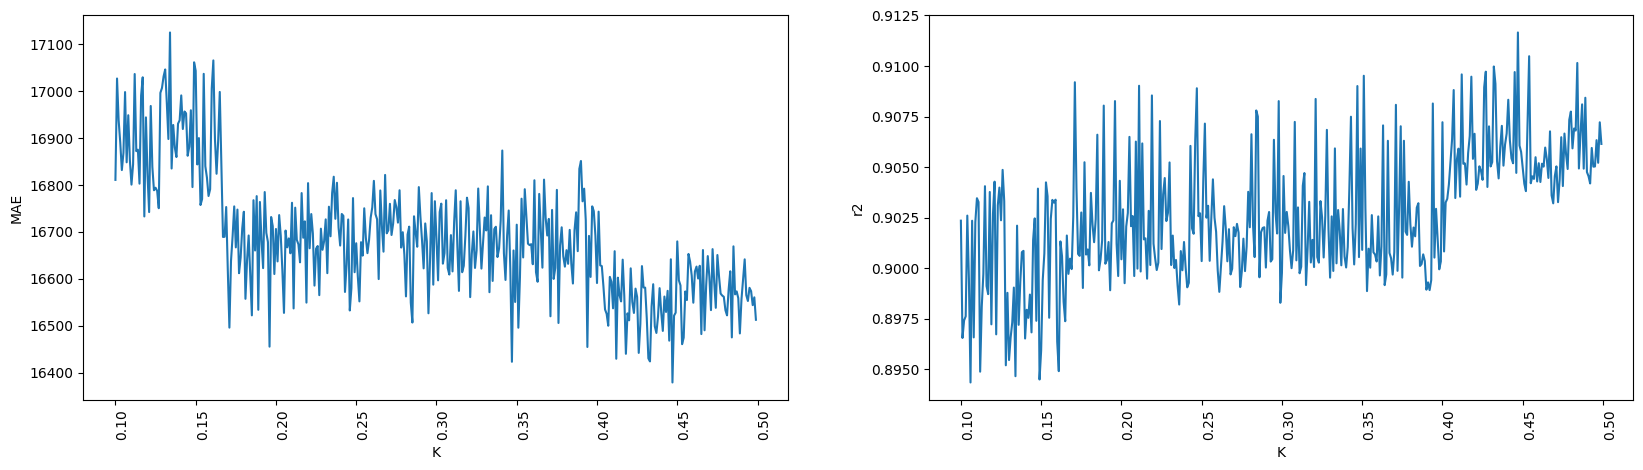

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


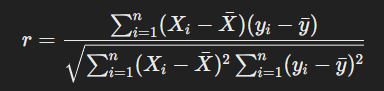

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.4882156521131217


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,23803.802137,41415.407837,0.776380
1,6,24251.126050,41745.410190,0.772802
2,7,24371.040311,39808.731667,0.793394
3,8,24270.082023,37517.646275,0.816491
4,9,24549.479983,38433.259612,0.807425
...,...,...,...,...
110,115,16816.727133,27398.273923,0.902134
111,116,17000.263925,28095.067341,0.897093
112,117,16956.342139,28008.609372,0.897725
113,118,16968.136008,28207.639121,0.896266


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
103,108,16714.425543,27033.011023,0.904726
114,119,16750.306310,27246.972780,0.903212
107,112,16768.177715,27147.622772,0.903916
86,91,16783.352999,27417.735389,0.901995
100,105,16808.038348,27532.233165,0.901174
...,...,...,...,...
0,5,23803.802137,41415.407837,0.776380
1,6,24251.126050,41745.410190,0.772802
3,8,24270.082023,37517.646275,0.816491
2,7,24371.040311,39808.731667,0.793394


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


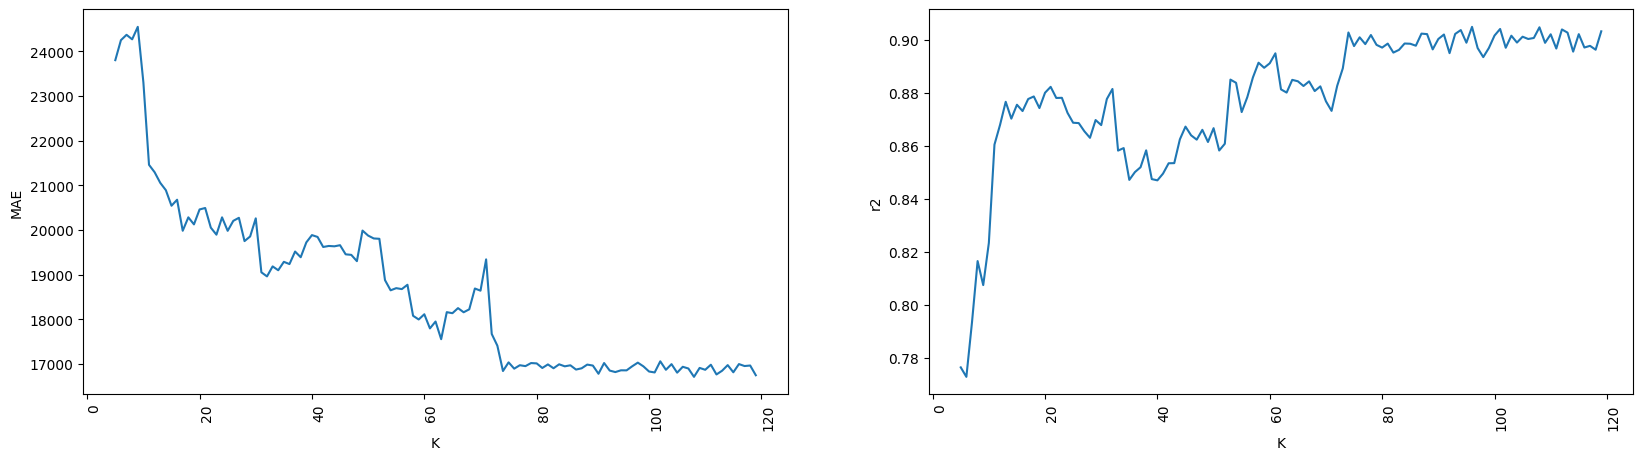

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

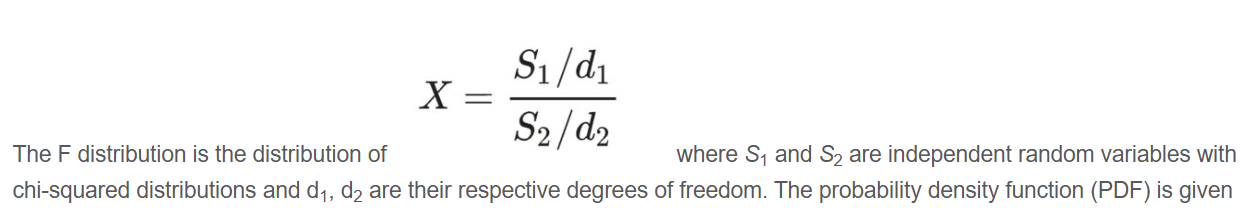

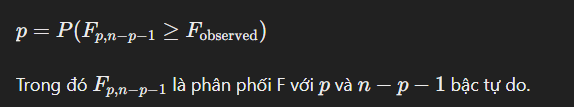

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,23316.007330,36070.776601,0.830372
1,6,22689.712702,34452.201124,0.845254
2,7,22082.689947,33887.192529,0.850288
3,8,22545.498732,34611.649364,0.843818
4,9,22287.966271,33240.327352,0.855949
...,...,...,...,...
110,115,16926.190541,27991.398665,0.897851
111,116,16779.281599,27066.631086,0.904489
112,117,16964.726393,27874.608845,0.898701
113,118,16951.801980,27917.276206,0.898391


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
29,34,16584.825109,26211.599342,0.910428
70,75,16642.033623,26754.010907,0.906682
28,33,16659.455699,26188.388087,0.910586
57,62,16680.321385,26826.074839,0.906179
79,84,16732.657275,27051.654079,0.904594
...,...,...,...,...
2,7,22082.689947,33887.192529,0.850288
4,9,22287.966271,33240.327352,0.855949
3,8,22545.498732,34611.649364,0.843818
1,6,22689.712702,34452.201124,0.845254


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


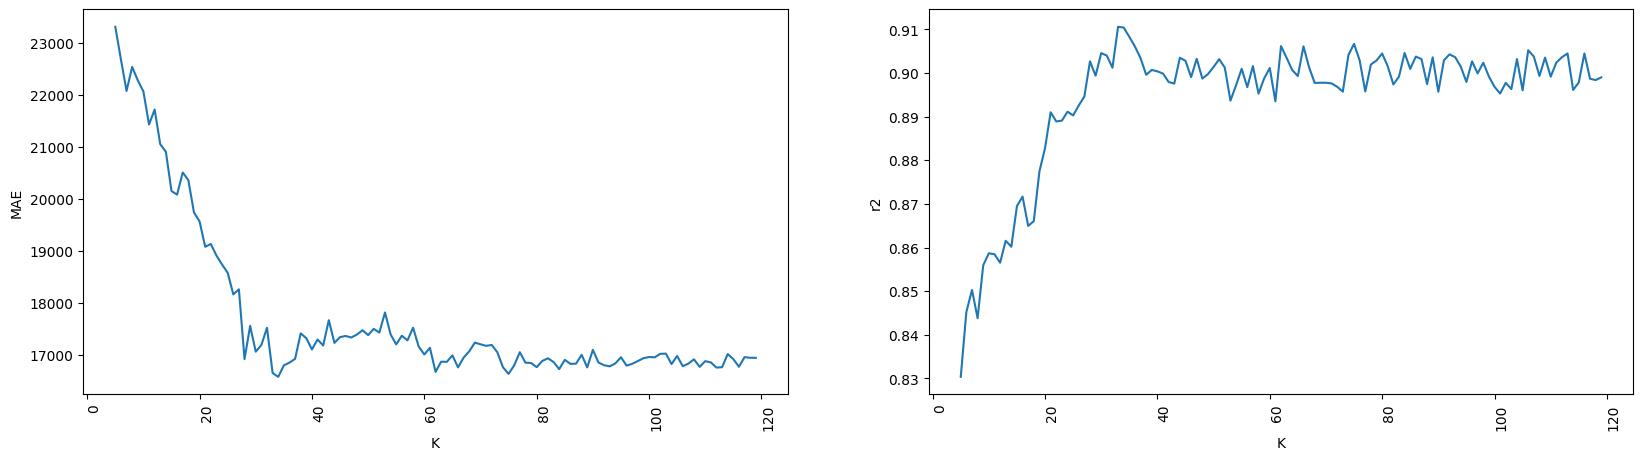

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

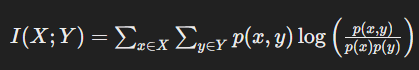

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

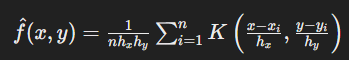

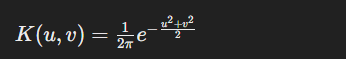

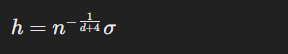

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,26166.554367,41243.271867,0.778235
1,6,25779.496307,41414.287035,0.776392
2,7,25218.888807,40331.206684,0.787935
3,8,24031.618685,39425.278484,0.797355
4,9,23546.560138,37637.249871,0.815319
...,...,...,...,...
110,115,16835.885125,27541.251621,0.901110
111,116,16808.537117,27271.831615,0.903035
112,117,16854.541055,27399.108606,0.902128
113,118,16794.924462,27393.534538,0.902168


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
68,73,16738.204170,27121.209638,0.904103
104,109,16768.737419,27317.342903,0.902711
108,113,16770.275750,27180.876718,0.903681
59,64,16772.114148,27078.104818,0.904408
85,90,16787.834642,27367.018365,0.902357
...,...,...,...,...
4,9,23546.560138,37637.249871,0.815319
3,8,24031.618685,39425.278484,0.797355
2,7,25218.888807,40331.206684,0.787935
1,6,25779.496307,41414.287035,0.776392


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_16536\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


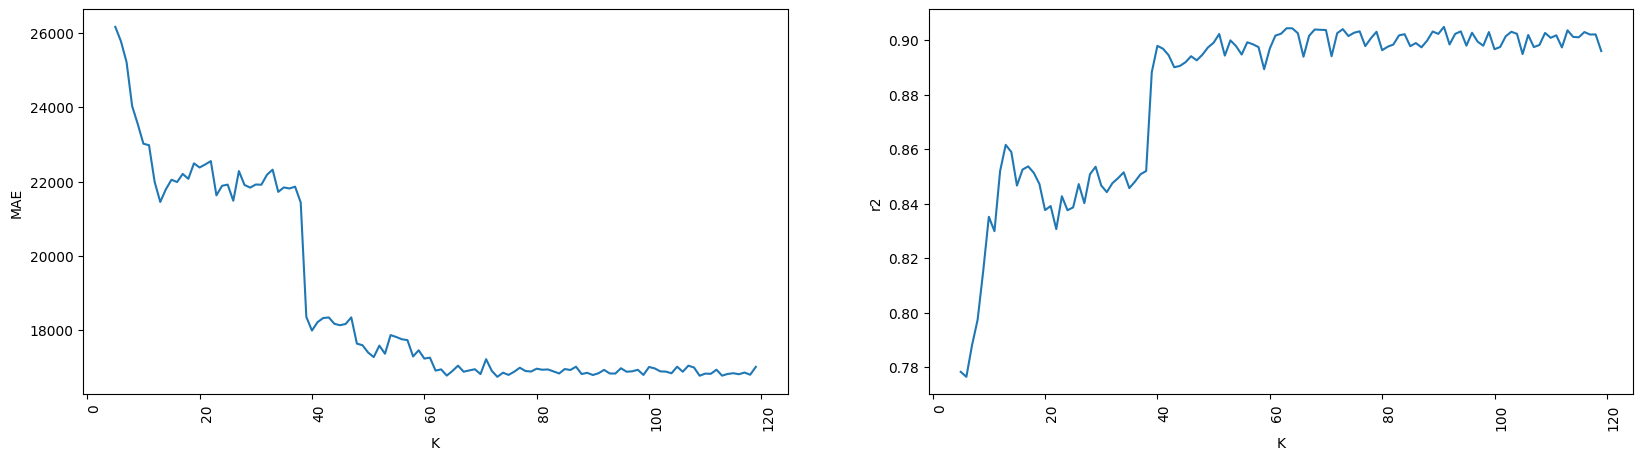

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204
1,6,34660.461597,50002.241821,0.674039
2,7,31564.708773,45860.413561,0.725803
3,8,30212.362959,41950.167250,0.770568
4,9,28986.486315,40015.679080,0.791240
...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253
111,116,21786.549622,31645.795929,0.869438
112,117,22088.993428,31976.786881,0.866692
113,118,22124.740073,32005.206735,0.866455


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,34354.505424,51440.370481,0.655020
1,6,33572.804895,50895.643927,0.662287
2,7,31998.620106,47606.662232,0.704524
3,8,31284.920167,46590.490643,0.717004
4,9,31376.756052,46259.713117,0.721008
...,...,...,...,...
110,115,19547.763778,30557.023160,0.878267
111,116,19783.132247,31223.937471,0.872895
112,117,19642.594200,30488.959965,0.878809
113,118,19589.283325,30425.147489,0.879315


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,26166.554367,41243.271867,0.778235
1,6,25779.496307,41414.287035,0.776392
2,7,25218.888807,40331.206684,0.787935
3,8,24031.618685,39425.278484,0.797355
4,9,23546.560138,37637.249871,0.815319
...,...,...,...,...
110,115,16835.885125,27541.251621,0.901110
111,116,16808.537117,27271.831615,0.903035
112,117,16854.541055,27399.108606,0.902128
113,118,16794.924462,27393.534538,0.902168


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,35890.359891,50901.949232,0.662204,34354.505424,51440.370481,0.655020
1,6,34660.461597,50002.241821,0.674039,33572.804895,50895.643927,0.662287
2,7,31564.708773,45860.413561,0.725803,31998.620106,47606.662232,0.704524
3,8,30212.362959,41950.167250,0.770568,31284.920167,46590.490643,0.717004
4,9,28986.486315,40015.679080,0.791240,31376.756052,46259.713117,0.721008
...,...,...,...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253,19547.763778,30557.023160,0.878267
111,116,21786.549622,31645.795929,0.869438,19783.132247,31223.937471,0.872895
112,117,22088.993428,31976.786881,0.866692,19642.594200,30488.959965,0.878809
113,118,22124.740073,32005.206735,0.866455,19589.283325,30425.147489,0.879315


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,35890.359891,50901.949232,0.662204,34354.505424,51440.370481,0.655020,26166.554367,41243.271867,0.778235
1,6,34660.461597,50002.241821,0.674039,33572.804895,50895.643927,0.662287,25779.496307,41414.287035,0.776392
2,7,31564.708773,45860.413561,0.725803,31998.620106,47606.662232,0.704524,25218.888807,40331.206684,0.787935
3,8,30212.362959,41950.167250,0.770568,31284.920167,46590.490643,0.717004,24031.618685,39425.278484,0.797355
4,9,28986.486315,40015.679080,0.791240,31376.756052,46259.713117,0.721008,23546.560138,37637.249871,0.815319
...,...,...,...,...,...,...,...,...,...,...
110,115,21814.597153,31668.144146,0.869253,19547.763778,30557.023160,0.878267,16835.885125,27541.251621,0.901110
111,116,21786.549622,31645.795929,0.869438,19783.132247,31223.937471,0.872895,16808.537117,27271.831615,0.903035
112,117,22088.993428,31976.786881,0.866692,19642.594200,30488.959965,0.878809,16854.541055,27399.108606,0.902128
113,118,22124.740073,32005.206735,0.866455,19589.283325,30425.147489,0.879315,16794.924462,27393.534538,0.902168


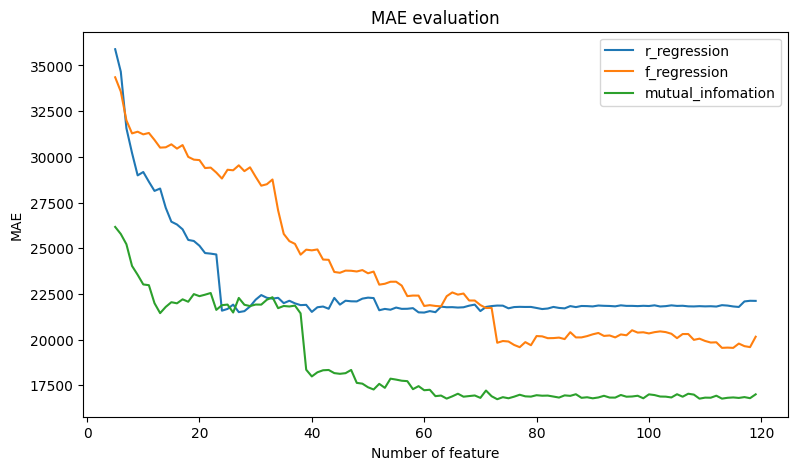

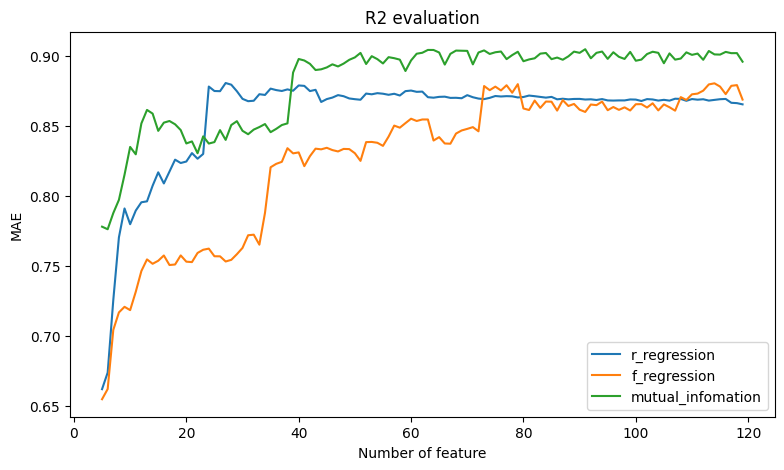

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()